In [1]:
import matplotlib.pyplot as plt
from utils import get_params_from_file as get_params, get_all_params, comm_dict, get_pandas_dataframe

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [182]:
import numpy as np
np.random.seed(1)

In [114]:
prefix = "history"
types = [6,8,8.2,9.2,9.3]
filenames = [f"history_test{i}.txt" for i in types]
filenames = [prefix+'/'+f for f in filenames]

In [115]:
train_filenames = [f"history{i}.txt" for i in types]

train_filenames = [prefix+'/'+f for f in train_filenames]

In [116]:
acc = [get_params(f, "Test accuracy", with_name = False) for f in filenames]

In [117]:
test_examples = [get_params(f, "test_examples") for f in filenames]

In [118]:
title = [get_params(f, "load_model_name", with_name = False) for f in filenames]
title = [t[t.index('/')+1:-3] for t in title]

In [119]:
params = [get_all_params(f, False, False, 
                        "input_shape", 
                        "batch_size", 
                        "epochs", 
                        "learning_rate", 
                        "l2", 
                        "all_examples") for f in train_filenames]


In [120]:
for i in range(len(params)):
    params[i]["Accuracy"] = acc[i]
    params[i]["Test examples"] = test_examples[i]

In [121]:
all_params = get_pandas_dataframe(comm_dict(params, title))

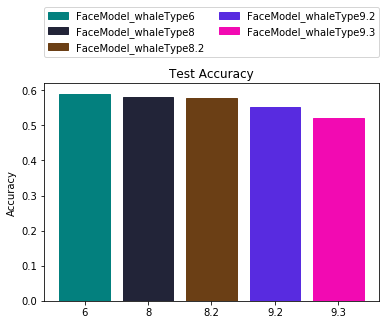

,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType8.2,FaceModel_whaleType9.2,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,100,200,100,200,200
epochs,50,90,90,84,84
learning_rate,0.001,0.001,0.001,0.01,0.001
l2,0.0001,0.0001,0.0001,0.0001,0.0001
all_examples,2100,4500,4500,2100,2100
Accuracy,0.59,0.58,0.576667,0.551667,0.521667
Test examples,600,600,600,600,600


In [206]:
fig, ax = plt.subplots()
ind = np.arange(1,6)

np.random.seed(9)
bars = plt.bar(ind, acc)
colors = [np.random.rand(1,3) for _ in range(len(bars))]

[b.set_color(c[0]) for b,c in zip(bars,colors)]
ax.set_xticks(ind)
ax.set_xticklabels(types)
plt.legend(bars, title, bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
ax.set_ylabel("Accuracy")
ax.set_title("Test Accuracy")
plt.show()
all_params